In [1]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient
from sunpy.timeseries import TimeSeries
from stixpy import timeseries
import matplotlib.pyplot as plt
import sys
import matplotlib.dates as mdates
import datetime
import numpy as np
from datetime import date, timedelta
import pandas as pd
import requests
from scipy.io import readsav
from scipy.interpolate import griddata
from scipy import interpolate

In [2]:
def get_stix(start, end, path):
    #Getting stix Data
    query = Fido.search(a.Time(start, end), a.Instrument.stix, a.stix.DataProduct.ql_lightcurve)
    files = Fido.fetch(query, path = path)
    ql_lightcurves = TimeSeries(files)
    
    #Concatenate data to represent time range
    combined_ts = ql_lightcurves[0]
    for lc in ql_lightcurves[1:]:
        combined_ts = combined_ts.concatenate(lc)
        
    return (combined_ts)

In [4]:
def stix_plot(start_day, end_day, path, start_time, end_time, ):
    
    start_str = start_day
    
    combined_ts = get_stix(start_day, end_day, path)
    
    stix = combined_ts.to_dataframe()
    stix = stix.drop(['control_index', 'timedel', 'triggers', 'triggers_err', 'rcr' ,'4.0-10.0_err' ,'10.0-15.0_err' ,'15.0-25.0_err' ,'25.0-50.0_err', '50.0-84.0_err'], axis=1)
    
    start_hour = int(start_time[0:2])
    start_minute = int(start_time[3:5])
    start_second = int(start_time[6:8])
    
    end_hour = int(end_time[0:2])
    end_minute = int(end_time[3:5])
    end_second = int(end_time[6:8])

    start_year = int(start_day[0:4])
    start_month = int(start_day[5:7])
    start_day = int(start_day[8:10])

    end_year = int(end_day[0:4])
    end_month = int(end_day[5:7])
    end_day = int(end_day[8:10])
    
    fig = plt.figure(figsize=(12.,8.))
    ax = plt.subplot(111)
    ax.xaxis_date()
    date_format = mdates.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlim([datetime.datetime(start_year, start_month, start_day, start_hour, start_minute, start_second), datetime.datetime(start_year, start_month, start_day, end_hour, end_minute, end_second)])
    lineObjects = ax.plot(stix, label = stix.columns)
    ax.set_title('STIX X-ray Flux')
    ax.set_ylim([1, 1000000])
    ax.set_xlabel("Time (UT) " + start_str[0:10])
    ax.set_ylabel("Counts$^{-1}$ keV$^{-1}$")
    ax.set_xlim([datetime.datetime(start_year, start_month, start_day, start_hour, start_minute, start_second), datetime.datetime(start_year, start_month, start_day, end_hour, end_minute, end_second)])
    plt.legend(iter(lineObjects), ('4.0-10.0 keV', '10.0-15.0 keV', '15.0-25.0 keV', '25.0-50.0 keV', '50.0-84.0 keV'), loc='upper right')	
    plt.yscale('log')
    #ax.axes.get_xaxis().set_visible(False)
    #fig.savefig(sample_path + "/STIX_plot.png")

Files Downloaded: 100%|█████████████████████████| 2/2 [00:00<00:00, 18.45file/s]


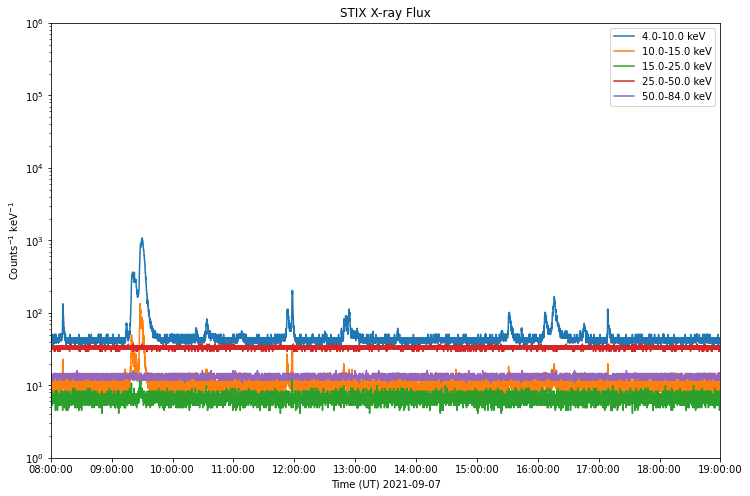

In [5]:
start_day_sample = '2021-09-07'
end_day_sample = '2021-09-08'

sample_path = '/Users/thomas/SS Research Project/week 1'
start_time_sample = '08:00:00'
end_time_sample = '19:00:00'

stix_plot(start_day_sample, end_day_sample, sample_path, start_time_sample, end_time_sample)

plt.show()